In [1]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # Linear algebra library
import pandas as pd

In [2]:
expr_df = pd.read_csv("../metadata/length_and_depth.csv")
expr_df = expr_df.drop("nvar", axis=1)
expr_df = expr_df.rename(columns={
    "length" : "expr_length",
    "depth" : "expr_depth"
})
expr_df

,problem,objtype,variable_nvar,expr_length,expr_depth
0,NZF1,least_squares,True,250,8
1,arglina,least_squares,True,10404,9
2,arglinb,least_squares,True,40200,8
3,arglinc,other,True,39204,7
4,argtrig,other,True,497,7
...,...,...,...,...,...
100,tridia,other,True,398,6
101,vardim,other,True,798,6
102,vibrbeam,least_squares,False,481,13
103,watson,least_squares,False,3900,12


In [3]:
complete_df = pd.read_csv("../results/complete_dataset_as_of_nov6.csv")
complete_df = complete_df[complete_df["is_init_run"] == 0]
complete_df = complete_df.rename(columns={"name" : "problem"})
df = complete_df.merge(
    expr_df,
    on = 'problem',
    how = "inner"
)
df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,neval_grad,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,315,0.000031,0.001440,5,False,False,least_squares,True,250,8
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,216,0.000019,0.001440,5,False,False,least_squares,True,250,8
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,228,0.000016,0.001440,5,False,False,least_squares,True,250,8
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,203,0.000017,0.001440,5,False,False,least_squares,True,250,8
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,225,0.000017,0.001440,5,False,False,least_squares,True,250,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,first_order,woods,LBFGSSolver,96,1000,1.482090,3.197624,64,64,84,...,75,0.001356,0.008664,5,False,True,other,True,425,7
18822,first_order,woods,LBFGSSolver,97,1000,1.481800,3.229800,64,64,84,...,75,0.001373,0.008664,5,False,True,other,True,425,7
18823,first_order,woods,LBFGSSolver,98,1000,1.482000,3.261976,64,64,84,...,75,0.001367,0.008664,5,False,True,other,True,425,7
18824,first_order,woods,LBFGSSolver,99,1000,1.481908,3.294152,64,64,84,...,75,0.001358,0.008664,5,False,True,other,True,425,7


In [4]:
group_cols = ["problem", "nvar"]

d = df[df["time"].notna()].copy()
d = d.sort_values(group_cols + ["time", "mem"], ascending=True)

best_idx = d.groupby(group_cols)["time"].idxmin()
best_mem_df = d.loc[best_idx].reset_index(drop=True)
best_mem_df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,neval_grad,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth
0,first_order,NZF1,LBFGSSolver,64,91,1.405412,0.241360,59,59,70,...,64,0.000017,0.001440,5,False,False,least_squares,True,250,8
1,first_order,NZF1,LBFGSSolver,72,988,3.127719,2.406504,81,81,94,...,86,0.001715,0.008600,5,False,True,least_squares,True,250,8
2,first_order,arglina,LBFGSSolver,4,100,0.004524,0.029440,1,1,3,...,3,0.000059,0.001520,5,False,False,least_squares,True,10404,9
3,first_order,arglina,LBFGSSolver,5,1000,1.400665,0.240920,1,1,3,...,3,0.005946,0.008664,5,False,True,least_squares,True,10404,9
4,first_order,arglinb,LBFGSSolver,1,100,1.422291,0.020488,2,2,29,...,5,0.000051,0.001520,5,False,False,least_squares,True,40200,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,first_order,vardim,LBFGSSolver,21,1000,28.733923,1.509576,1165,1165,6897,...,6873,0.004314,0.008664,5,False,True,other,True,798,6
180,first_order,vibrbeam,LBFGSSolver,11,8,0.578265,0.054456,103,103,179,...,126,0.000006,0.000720,5,False,False,least_squares,False,481,13
181,unbounded,watson,LBFGSSolver,51,31,1.019050,32.288992,1,1,8,...,8,0.001956,4.349024,42554,False,False,least_squares,False,3900,12
182,first_order,woods,LBFGSSolver,8,100,1.288446,0.060864,45,45,69,...,60,0.000016,0.001520,5,False,False,other,True,425,7


In [5]:
df = df.copy()
df["is_best_mem"] = 0
df.loc[best_idx, "is_best_mem"] = 1

# Optional: if you want a clean sequential index after all operations
df = df.reset_index(drop=True)
df


,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth,is_best_mem
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,0.000031,0.001440,5,False,False,least_squares,True,250,8,0
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,0.000019,0.001440,5,False,False,least_squares,True,250,8,0
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,0.000016,0.001440,5,False,False,least_squares,True,250,8,0
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,0
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18821,first_order,woods,LBFGSSolver,96,1000,1.482090,3.197624,64,64,84,...,0.001356,0.008664,5,False,True,other,True,425,7,0
18822,first_order,woods,LBFGSSolver,97,1000,1.481800,3.229800,64,64,84,...,0.001373,0.008664,5,False,True,other,True,425,7,0
18823,first_order,woods,LBFGSSolver,98,1000,1.482000,3.261976,64,64,84,...,0.001367,0.008664,5,False,True,other,True,425,7,0
18824,first_order,woods,LBFGSSolver,99,1000,1.481908,3.294152,64,64,84,...,0.001358,0.008664,5,False,True,other,True,425,7,0


In [6]:
# unique instances: one row per (problem, nvar)
instances = df[["problem", "nvar"]].drop_duplicates()

# shuffle instances
instances = instances.sample(frac=1, random_state=42).reset_index(drop=True)

n = len(instances)
n_train = int(0.7 * n)
n_valid = int(0.15 * n)

train_inst = instances.iloc[:n_train]
valid_inst = instances.iloc[n_train:n_train + n_valid]
test_inst  = instances.iloc[n_train + n_valid:]

# assign rows to splits by (problem, nvar)
train_df = df.merge(train_inst, on=["problem", "nvar"], how="inner").reset_index(drop=True)
valid_df = df.merge(valid_inst, on=["problem", "nvar"], how="inner").reset_index(drop=True)
test_df  = df.merge(test_inst,  on=["problem", "nvar"], how="inner").reset_index(drop=True)
train_df

,status,problem,solver,mem,nvar,time,memory,num_iter,nvmops,neval_obj,...,init_eval_grad_time,init_eval_grad_mem,init_eval_grad_alloc,is_init_run,is_scalable,objtype,variable_nvar,expr_length,expr_depth,is_best_mem
0,first_order,NZF1,LBFGSSolver,1,91,1.409402,0.125416,287,287,328,...,0.000031,0.001440,5,False,False,least_squares,True,250,8,0
1,first_order,NZF1,LBFGSSolver,2,91,1.407668,0.095296,199,199,223,...,0.000019,0.001440,5,False,False,least_squares,True,250,8,0
2,first_order,NZF1,LBFGSSolver,3,91,1.407882,0.103456,213,213,234,...,0.000016,0.001440,5,False,False,least_squares,True,250,8,0
3,first_order,NZF1,LBFGSSolver,4,91,1.407476,0.098352,191,191,209,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,0
4,first_order,NZF1,LBFGSSolver,5,91,1.407906,0.108416,209,209,231,...,0.000017,0.001440,5,False,False,least_squares,True,250,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13021,first_order,vardim,LBFGSSolver,96,1000,29.012861,3.926536,1165,1165,6897,...,0.004181,0.008664,5,False,True,other,True,798,6,0
13022,first_order,vardim,LBFGSSolver,97,1000,28.999431,3.958712,1165,1165,6897,...,0.004192,0.008664,5,False,True,other,True,798,6,0
13023,first_order,vardim,LBFGSSolver,98,1000,28.868402,3.990888,1165,1165,6897,...,0.004235,0.008664,5,False,True,other,True,798,6,0
13024,first_order,vardim,LBFGSSolver,99,1000,28.898239,4.023064,1165,1165,6897,...,0.004209,0.008664,5,False,True,other,True,798,6,0


In [7]:
feature_cols = ["nvar", 
                "expr_length", 
                "expr_depth", 
                "mem",
                "init_eval_obj_time", 
                "init_eval_grad_time"
                ]
target_col = "is_best_mem"

X_train = train_df[feature_cols].to_numpy(dtype=float)
X_valid = valid_df[feature_cols].to_numpy(dtype=float)
X_test  = test_df[feature_cols].to_numpy(dtype=float)

t_train = train_df[target_col].to_numpy(dtype=float)
t_valid = valid_df[target_col].to_numpy(dtype=float)
t_test  = test_df[target_col].to_numpy(dtype=float)


In [8]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

seed = 0

# Important hyperparameters and compact grids
min_leaf_values = [1, 2, 5]             # regularization
max_feature_values = ["sqrt", "log2"]   # feature subsampling

results = []
best_score = -np.inf
best_params = None
best_model = None

for n in range(100, 200, 10):
    for d in range(15, 30, 2):
        for min_leaf in min_leaf_values:
            for max_feature in max_feature_values:
                rfc = RandomForestClassifier(
                    n_estimators=n,
                    max_depth=d,
                    min_samples_leaf=min_leaf,
                    max_features=max_feature,
                    criterion="gini",
                    bootstrap=True,
                    random_state=seed,
                    n_jobs=-1,
                    class_weight="balanced"
                )

                rfc.fit(X_train, t_train)
                valid_pred = rfc.predict(X_valid)
                score = np.mean(valid_pred == t_valid)

                results.append(
                    (n, d, min_leaf, max_feature, score)
                )
                if score > best_score:
                    best_score = score
                    best_params = (n, d, min_leaf, max_feature)
                    best_model = rfc
                    print(
                        "New best:",
                        "n =", n,
                        "depth =", d,
                        "min_leaf =", min_leaf,
                        "max_features =", max_feature,
                        "valid_acc =", score,
                    )
                else:
                    print(
                        "n =", n,
                        "depth =", d,
                        "min_leaf =", min_leaf,
                        "max_features =", max_feature,
                        "valid_acc =", score,
                    )
print("Best params (n, depth, min_leaf, max_features):", best_params)
print("Best validation accuracy:", best_score)
results.sort(key=lambda e: e[4])
print(results)

# If you want, evaluate the best model on test
test_acc = np.mean(best_model.predict(X_test) == t_test)
print("Test accuracy:", test_acc)


New best: n = 100 depth = 15 min_leaf = 1 max_features = sqrt valid_acc = 0.9907142857142858
n = 100 depth = 15 min_leaf = 1 max_features = log2 valid_acc = 0.9907142857142858
n = 100 depth = 15 min_leaf = 2 max_features = sqrt valid_acc = 0.9907142857142858
n = 100 depth = 15 min_leaf = 2 max_features = log2 valid_acc = 0.9907142857142858
n = 100 depth = 15 min_leaf = 5 max_features = sqrt valid_acc = 0.9892857142857143
n = 100 depth = 15 min_leaf = 5 max_features = log2 valid_acc = 0.9892857142857143
n = 100 depth = 17 min_leaf = 1 max_features = sqrt valid_acc = 0.9907142857142858
n = 100 depth = 17 min_leaf = 1 max_features = log2 valid_acc = 0.9907142857142858
n = 100 depth = 17 min_leaf = 2 max_features = sqrt valid_acc = 0.9907142857142858
n = 100 depth = 17 min_leaf = 2 max_features = log2 valid_acc = 0.9907142857142858
n = 100 depth = 17 min_leaf = 5 max_features = sqrt valid_acc = 0.9892857142857143
n = 100 depth = 17 min_leaf = 5 max_features = log2 valid_acc = 0.98928571428

In [9]:
best_n_estimators, best_max_depth, best_min_leaf, max_features = best_params

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_full = np.vstack([X_train, X_valid])
t_train_full = np.concatenate([t_train, t_valid])

final_rf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_leaf=best_min_leaf,
    max_features = max_features,
    class_weight="balanced",
    random_state=0,
    n_jobs=-1,
)
final_rf.fit(X_train_full, t_train_full)

y_pred_test = final_rf.predict(X_test)

test_mse = mean_squared_error(t_test, y_pred_test)
test_mae = mean_absolute_error(t_test, y_pred_test)
test_r2  = r2_score(t_test, y_pred_test)

print("Random forest test MSE:", test_mse)
print("Random forest test MAE:", test_mae)
print("Random forest test R^2:", test_r2)

Random forest test MSE: 0.009666666666666667
Random forest test MAE: 0.009666666666666667
Random forest test R^2: -0.009761023224503562


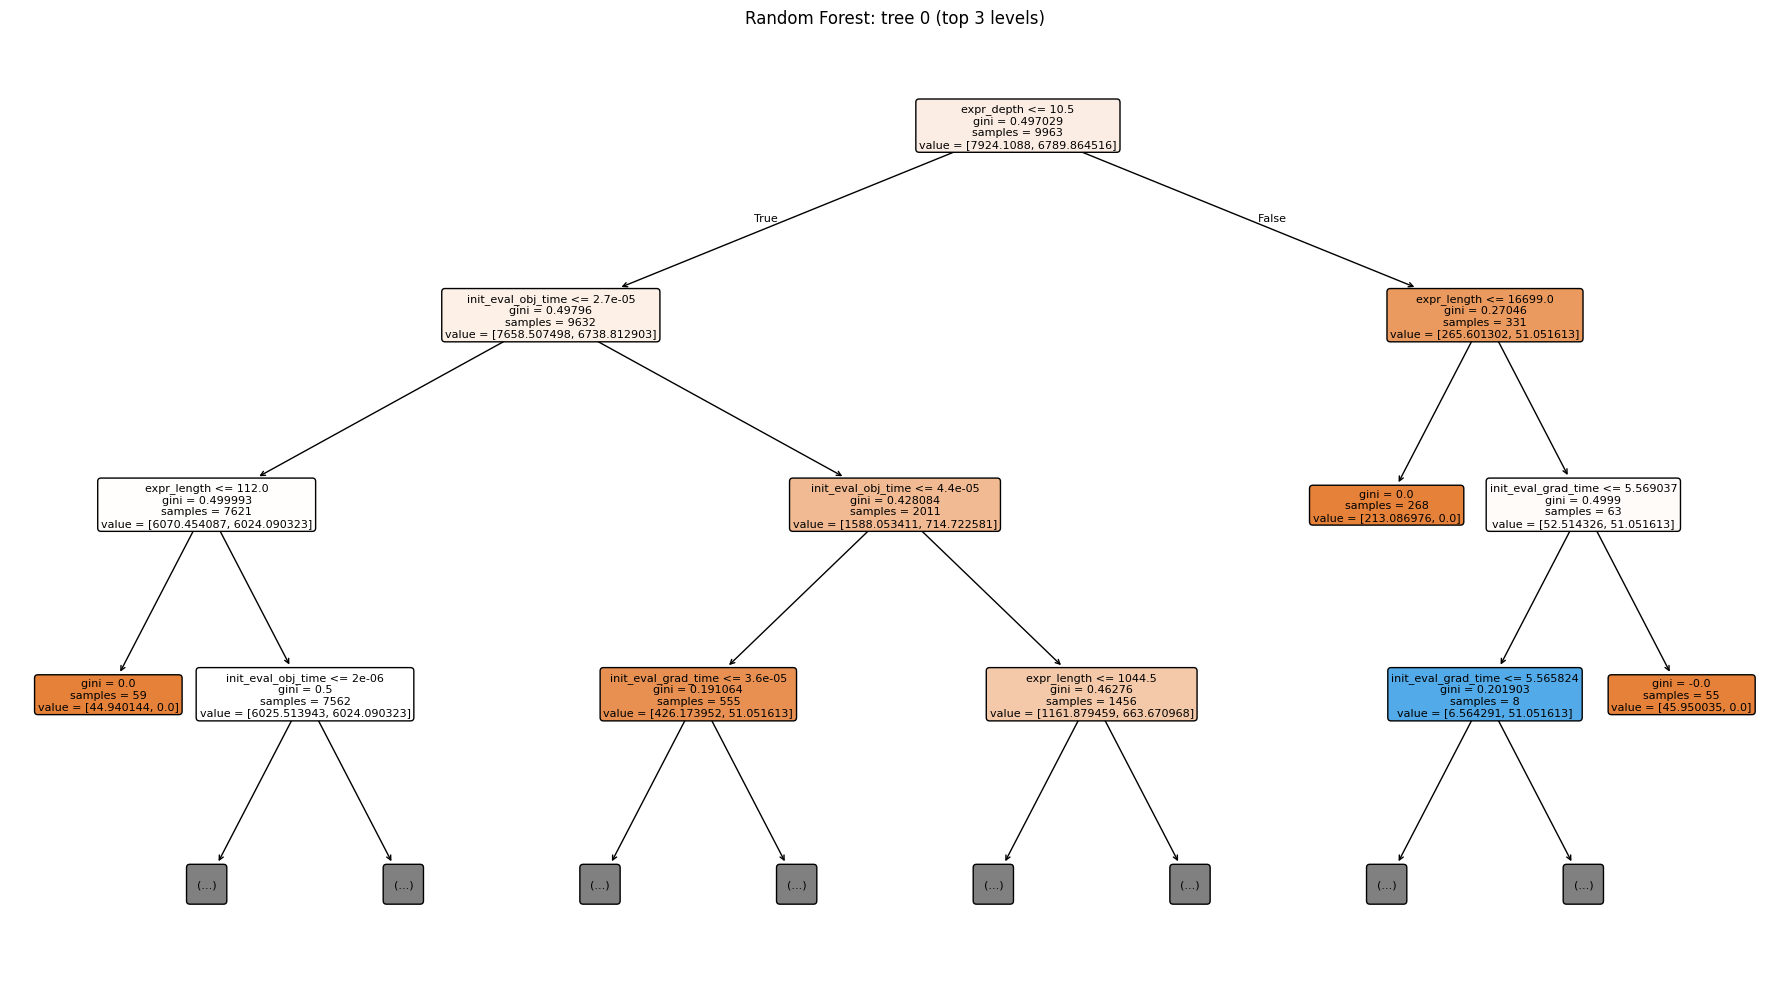

In [10]:
rf_tree0 = final_rf.estimators_[0]
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(18, 10))
tree.plot_tree(
    rf_tree0,
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=8,
    precision=6,
)
plt.title("Random Forest: tree 0 (top 3 levels)")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.tree import export_graphviz
import os

dot_data = export_graphviz(
    rf_tree0,
    # max_depth=6,
    out_file=None,               # return string instead of writing directly to file
    feature_names=feature_cols,
    filled=True,
    rounded=True,
    precision=6                  # <-- more decimal places
)

PDF written to: tree_plots\best_mem_predictor.pdf


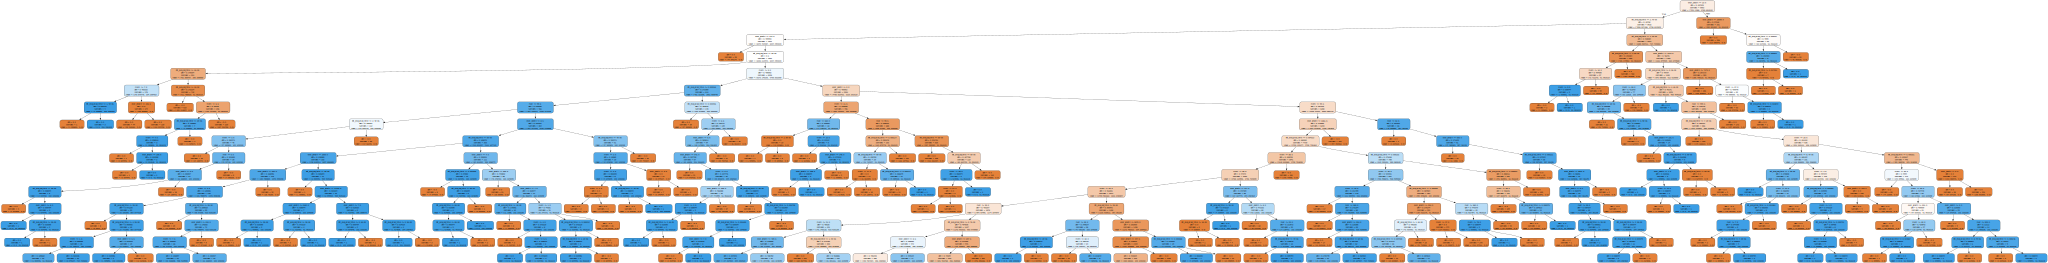

In [15]:
from graphviz import Source

os.makedirs("../tree_plots", exist_ok=True)

tree_graph = Source(dot_data)
pdf_path = tree_graph.render(
    filename="best_mem_predictor",    # base name
    directory="./tree_plots",
    format="pdf",
    cleanup=True                     # delete intermediate .dot
)
print("PDF written to:", pdf_path)
tree_graph

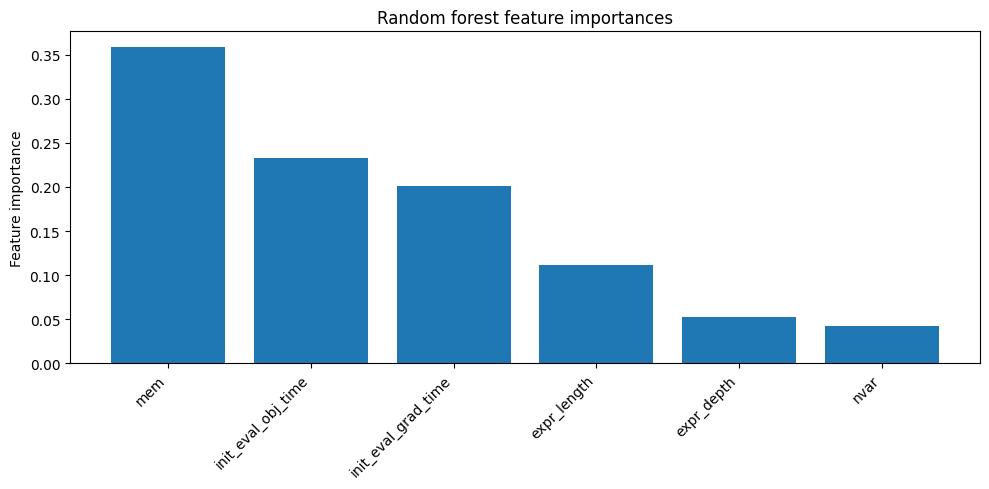

In [13]:
import numpy as np
import matplotlib.pyplot as plt

rf_importances = final_rf.feature_importances_
indices_rf = np.argsort(rf_importances)[::-1]  

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_cols)), rf_importances[indices_rf])
plt.xticks(range(len(feature_cols)), [feature_cols[i] for i in indices_rf], rotation=45, ha="right")
plt.ylabel("Feature importance")
plt.title("Random forest feature importances")
plt.tight_layout()
plt.show()
